IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

READING THE DATA

In [3]:
superster_sales = pd.read_excel('US Superstore data.xls')
superster_sales.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3167,3168,CA-2016-146682,2016-10-29,2016-10-31,First Class,KW-16435,Katrina Willman,Consumer,United States,Lansing,...,48911,Central,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,67.000,5,0.0,32.1600
524,525,US-2016-139486,2016-05-21,2016-05-23,First Class,LH-17155,Logan Haushalter,Consumer,United States,Los Angeles,...,90032,West,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,66.260,2,0.0,27.1666
7159,7160,CA-2015-145835,2015-05-13,2015-05-18,Second Class,BF-11170,Ben Ferrer,Home Office,United States,Chicago,...,60623,Central,TEC-PH-10004447,Technology,Phones,Toshiba IPT2010-SD IP Telephone,222.384,2,0.2,16.6788
7500,7501,CA-2017-121048,2017-07-14,2017-07-18,Standard Class,TC-21295,Toby Carlisle,Consumer,United States,Westminster,...,92683,West,TEC-AC-10000991,Technology,Accessories,Sony Micro Vault Click 8 GB USB 2.0 Flash Drive,140.970,3,0.0,19.7358
2152,2153,CA-2015-123505,2015-11-22,2015-11-26,Standard Class,AR-10540,Andy Reiter,Consumer,United States,Quincy,...,2169,East,OFF-PA-10002586,Office Supplies,Paper,Xerox 1970,14.940,3,0.0,7.0218


EXPLORATORY DATA

In [4]:
df = superster_sales.copy()

In [5]:
df.shape

(9994, 21)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


drop unnecessary columns

In [9]:
df=df.drop('Row ID',axis=1)

In [10]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [11]:
df=df.drop('Country',axis=1)

In [13]:
df.drop(['Order ID',
         'Ship Date', 
         'Ship Mode', 
         'Customer ID', 
         'Customer Name', 
         'Postal Code',
         'Product ID', 
         'Product Name'], 
        axis=1, inplace = True)

In [14]:
df.shape

(9994, 11)

review the product categories available

In [15]:
category_counts = df['Category'].value_counts()
category_counts

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

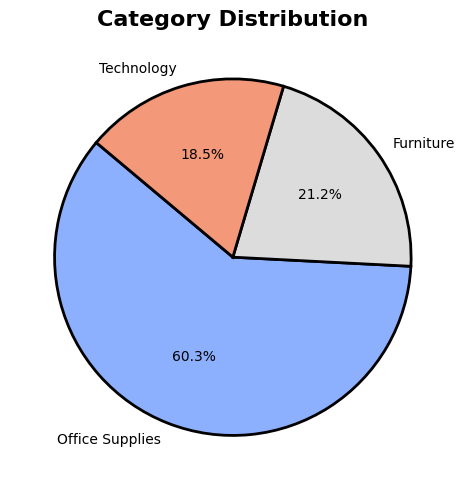

In [16]:
fig, axs = plt.subplots(figsize=(5, 5))

axs.pie(category_counts, 
           labels=category_counts.index, 
           autopct='%1.1f%%', 
           startangle=140, 
           colors=sns.color_palette('coolwarm', len(category_counts)),
           wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs.set_title('Category Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [41]:
import plotly.express as px

fig = px.sunburst(df,path=['Category','Sub-Category'],
                 values='Sales',color='Category',
                 hover_data =['Sales','Quantity','Profit'])
fig.update_layout(height=1000,title_text='Product Categories & Sub-Categories')
fig.show()

Above graphs indicates

->Share of each category & sub-category in Sales

->Which sub-category belongs to which category

->Share of sub-category for each category(click on any category to get detailed view of each sub-category)

You may get a wrong view of how many products are sold

total sales in pie plot

In [19]:
import plotly.graph_objects as go
from plotly.offline import iplot

data=go.Pie(labels=df['Sub-Category'].value_counts().index,
            values=df['Sub-Category'].value_counts(),
            textinfo='label+percent',
            hoverinfo='label+percent',
            marker=dict(line=dict(width=1.5)))

layout=go.Layout(title='Pie Plot for Total Sales for each Sub-Category',
                 titlefont=dict(size=25),
                 height=1000)

iplot(dict(data=data,layout=layout))

Review of sales and profits

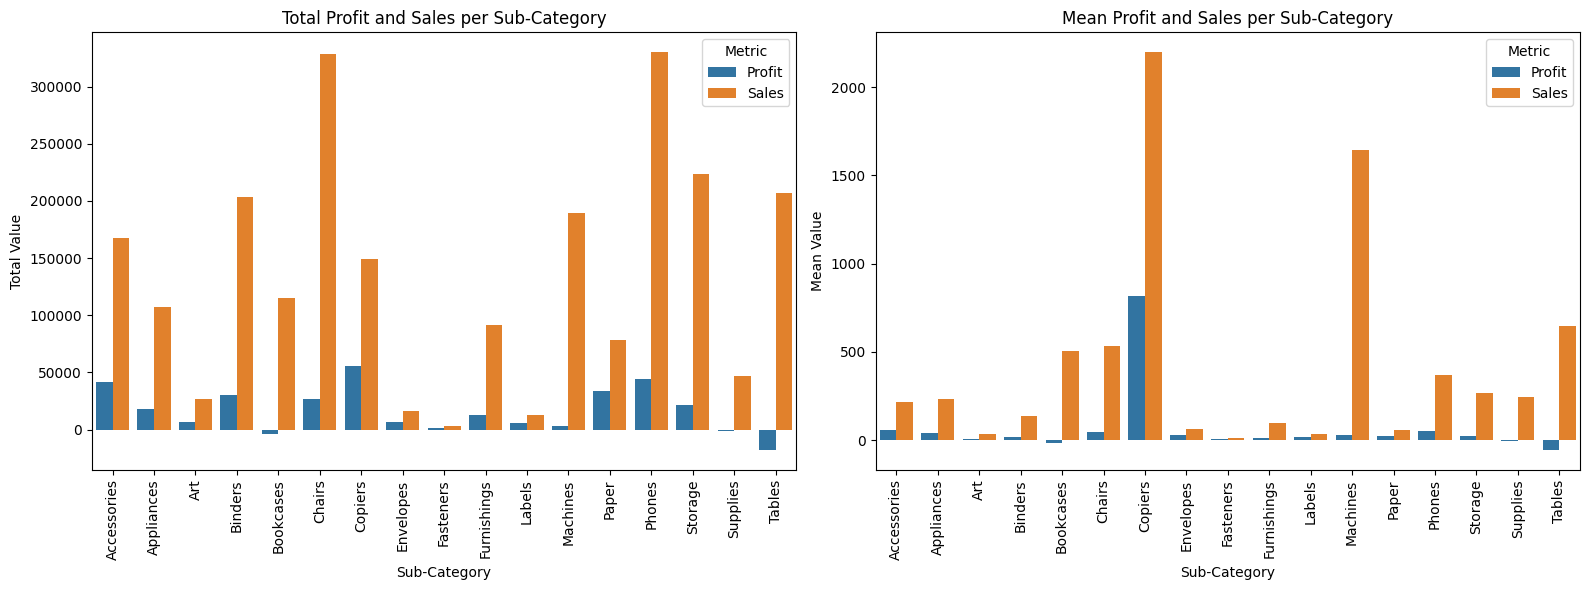

In [20]:
grouped_sum = df.groupby('Sub-Category')[['Profit', 'Sales']].sum().reset_index()
grouped_mean = df.groupby('Sub-Category')[['Profit', 'Sales']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=grouped_sum.melt(id_vars='Sub-Category', var_name='Metric', value_name='Value'),
            x='Sub-Category', y='Value', hue='Metric', ax=axes[0])
axes[0].set_title('Total Profit and Sales per Sub-Category')
axes[0].set_ylabel('Total Value')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=grouped_mean.melt(id_vars='Sub-Category', var_name='Metric', value_name='Value'),
            x='Sub-Category', y='Value', hue='Metric', ax=axes[1])
axes[1].set_title('Mean Profit and Sales per Sub-Category')
axes[1].set_ylabel('Mean Value')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

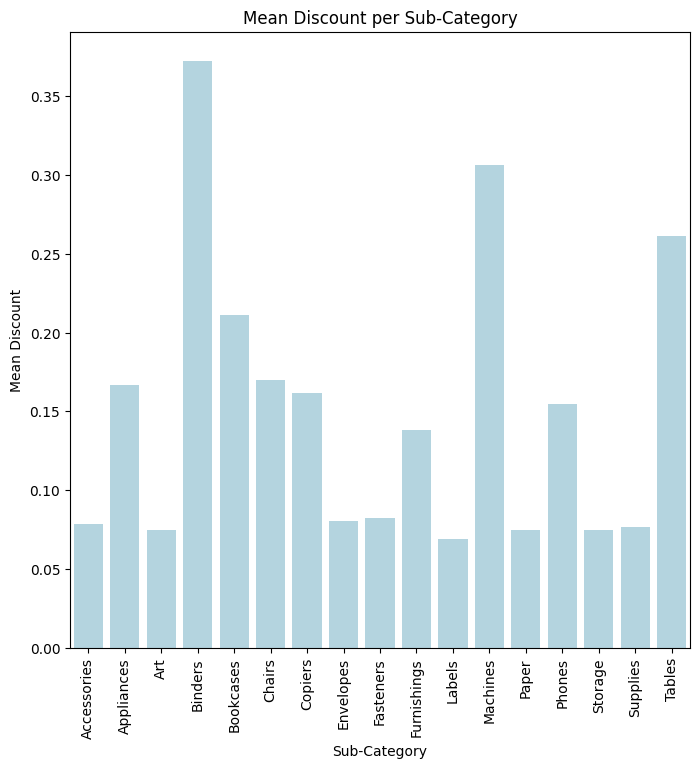

In [21]:
grouped_discount_mean = df.groupby('Sub-Category')['Discount'].mean().reset_index()

fig, axes = plt.subplots(figsize=(8, 8))

sns.barplot(data=grouped_discount_mean, x='Sub-Category', y='Discount', ax=axes, color='lightblue')
axes.set_title('Mean Discount per Sub-Category')
axes.set_ylabel('Mean Discount')
axes.tick_params(axis='x', rotation=90)

<h4>The store's discount system has a problem</h4>

->Best-selling products can be sold with no discount or with a partial discount

->Products that are causing damage to the store should be sold without discount

->Products with limited sales and higher profitability should be sold at a higher discount to attract customers

review of the sales of different parts of the US

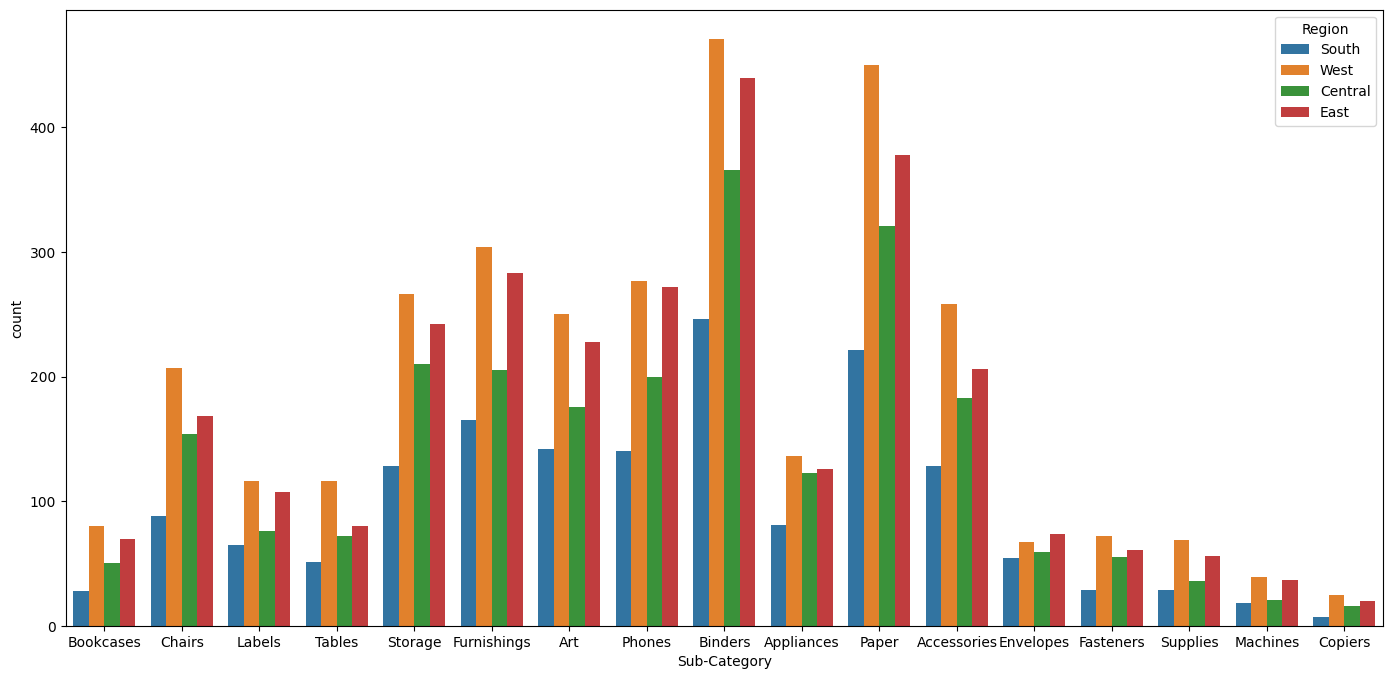

In [22]:
plt.figure(figsize=(17,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

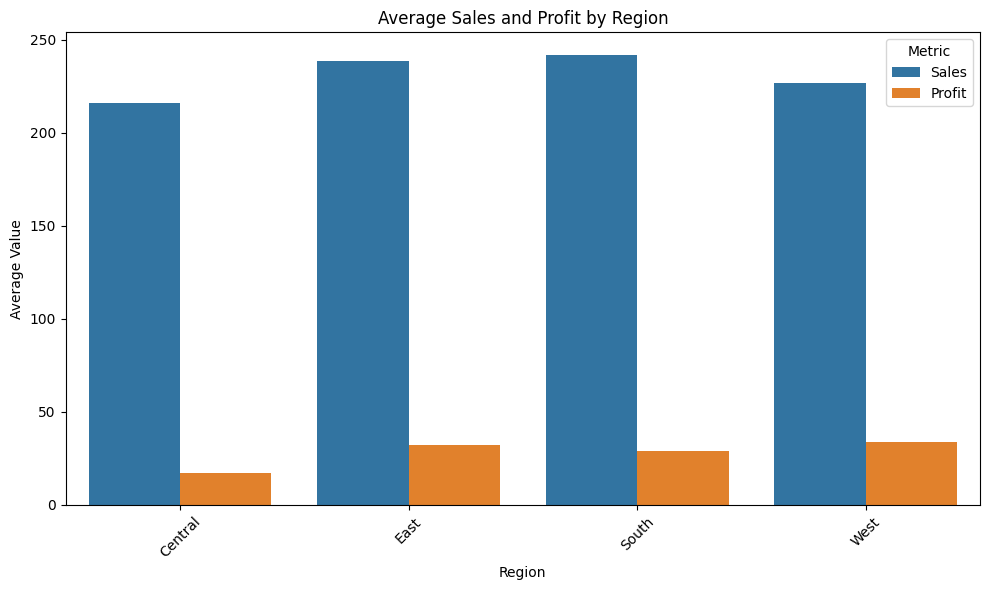

In [23]:
grouped_data = df.groupby('Region')[['Sales', 'Profit']].mean().reset_index()

melted_data = grouped_data.melt(id_vars='Region', var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Region', y='Value', hue='Metric')

plt.title('Average Sales and Profit by Region')
plt.ylabel('Average Value')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

People in the west and east are more inclined to buy from department superstores than those in the south and center.

People in the south have more expensive purchases.

with more details

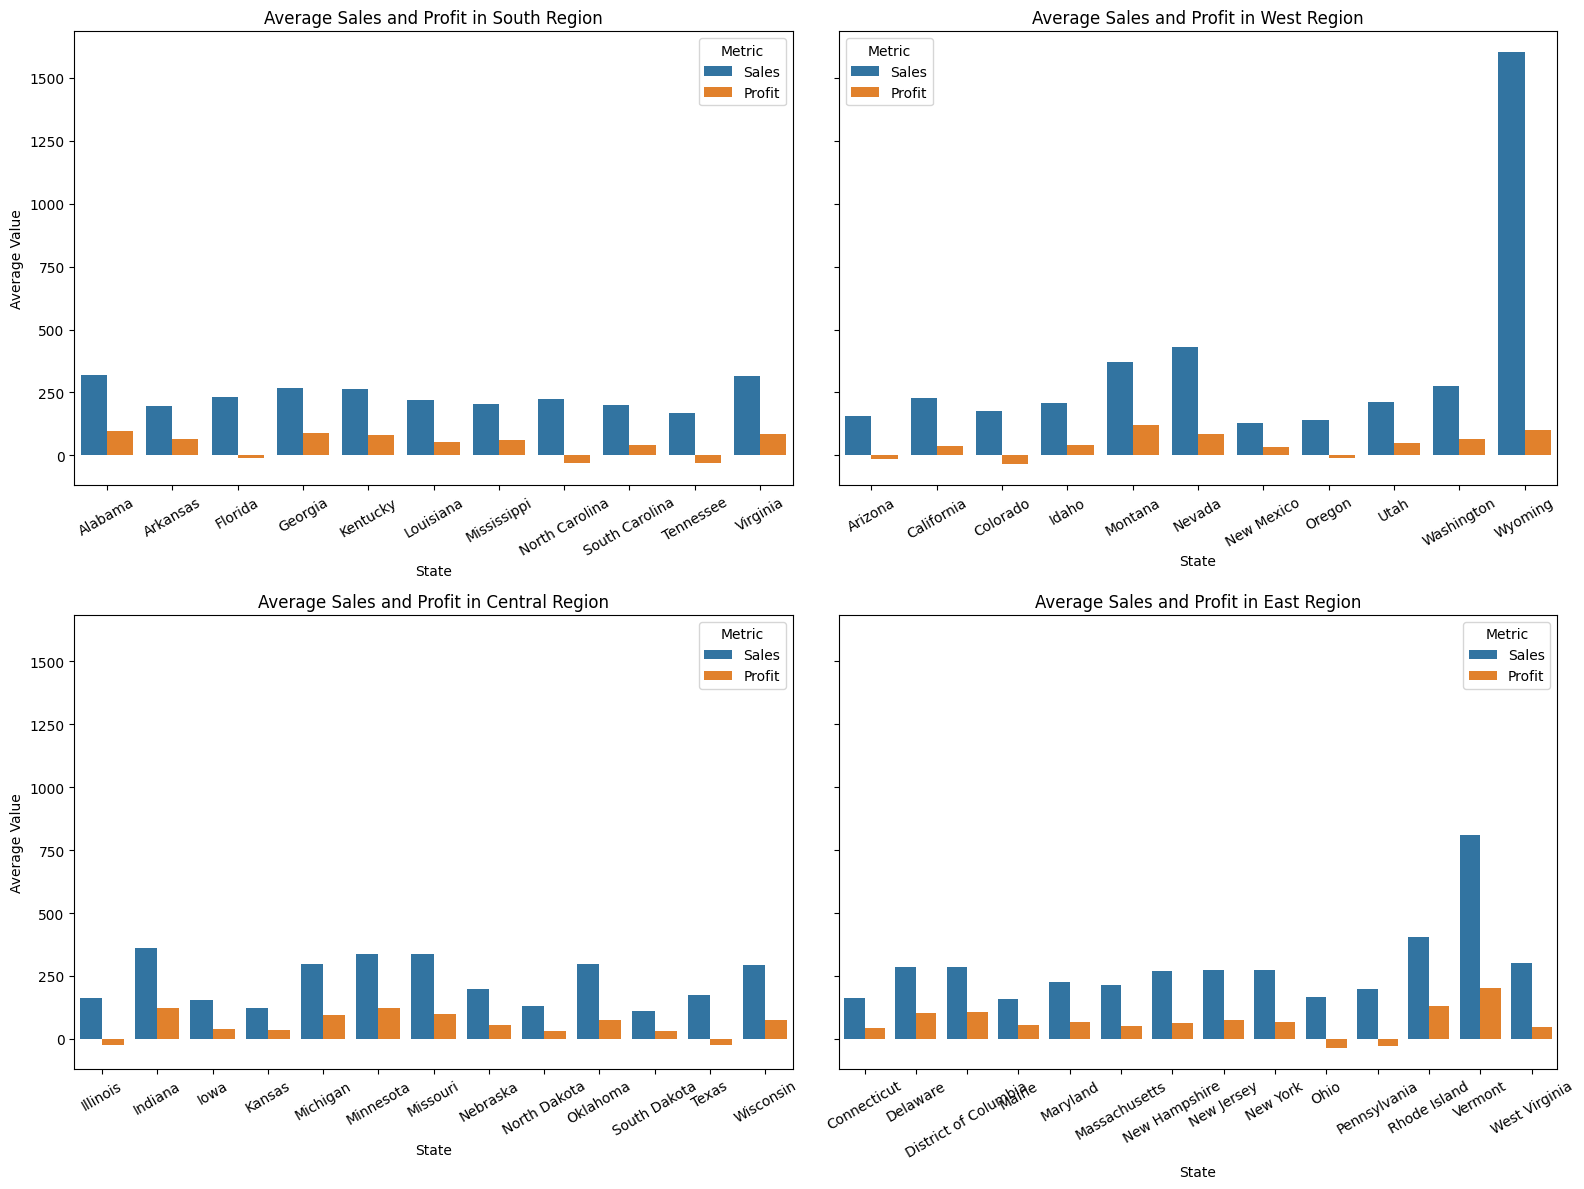

In [24]:
regions = df['Region'].unique()
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
axes = axes.flatten()

for i in range(4):
    df_region = df[df.Region == regions[i]].copy()
    grouped_data = df_region.groupby(['State'])[['Sales', 'Profit']].mean().reset_index()
    sns.barplot(data=grouped_data.melt(id_vars='State', var_name='Metric', value_name='Value'), x='State', y='Value', hue='Metric', ax=axes[i])
    
    axes[i].set_title(f'Average Sales and Profit in {regions[i]} Region')
    axes[i].set_ylabel('Average Value')
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Metric')

plt.tight_layout()
plt.show()

In [42]:
temp = df[['State','City','Sales']].groupby(['State','City'])['Sales'].sum().reset_index()
fig = px.treemap(temp,path=['State','City'], values='Sales')
fig.update_layout(height=1000,title='City-wise Sales',)
                 #color_discrete_sequence = px.colors.qualitative.Plotly)
fig.data[0].textinfo = 'label+text+value'
fig.show()

Above graph indicates

->Which city and state has how much sales

->Size of a tile indicates corresponding sales

In [28]:
df_notime = df[['Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()

In [ ]:
fig = go.Figure(data=px.scatter(x=df_notime.groupby('State').sum()['Sales'],
                                y=df_notime.groupby('State').sum()['Profit'],
                                hover_name=df_notime.groupby('State').sum().index,
                                size=df_notime.groupby('State').sum()['Quantity']))

fig['layout']=go.Layout(title='Sales & Profits by States',
                        titlefont=dict(size=25),
                        xaxis=dict(title='Sales',titlefont=dict(size=18)),
                        yaxis=dict(title='Profits',titlefont=dict(size=18)))
iplot(dict(data=fig))

Discount Analysis

In [35]:
labels = ['o% Discount','20% Discount','70% Discount','80% Discount','30% Discount','40% Discount',
          '60% Discount','10% Discount','50% Discount','15% Discount','32% Discount','45% Discount']

trace_pie = go.Pie(labels=labels,
                   values=df_notime['Discount'].value_counts(),
                   textinfo='label+percent',hoverinfo='label+percent',
                   marker=dict(line=dict(width=1.5)),)

layout = go.Layout(title='Discount Pie Plot' ,titlefont=dict(size=20))

iplot(dict(data=trace_pie,layout=layout))

In [36]:
data=go.Histogram(x=df_notime.sort_values('Discount')['Discount']),

layout=go.Layout(xaxis=dict(title='Sales Histogram Plot For Each Discount',title_font=dict(size=20)))

iplot(dict(data=data,layout=layout))

In [38]:
from plotly.subplots import make_subplots

fig = make_subplots(6,2,subplot_titles=['o% Discount','10% Discount','15% Discount',
                                          '20% Discount','30% Discount','32% Discount',
                                          '40% Discount','45% Discount','50% Discount',
                                          '60% Discount','70% Discount','80% Discount'],
                      horizontal_spacing=0.1,vertical_spacing=0.1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0]['Sales'],name='0% Distribution'),1,1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.1]['Sales'],name='10% Distribution'),1,2)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.15]['Sales'],name='15% Distribution'),2,1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.2]['Sales'],name='20% Distribution'),2,2)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.3]['Sales'],name='30% Distribution'),3,1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.32]['Sales'],name='32% Distribution'),3,2)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.4]['Sales'],name='40% Distribution'),4,1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.45]['Sales'],name='45% Distribution'),4,2)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.5]['Sales'],name='50% Distribution'),5,1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.6]['Sales'],name='60% Distribution'),5,2)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.7]['Sales'],name='70% Distribution'),6,1)
fig.add_trace(go.Histogram(x=df_notime[df_notime['Discount']==0.8]['Sales'],name='80% Distribution'),6,2)

fig.update_layout(
    width=2000,
    height=1000,
    title_text='Sales Distribution by Discount Levels'
)

By applying the right policy on discounts, the loss of the store can be avoided in some sections.

Segmentation

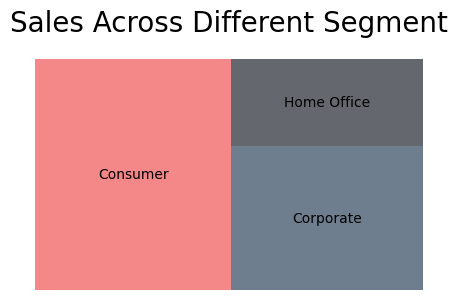

In [52]:
import squarify

df_tree = df[['Segment','Sales']]
df_tree = df_tree.groupby(['Segment']).sum().reset_index()

plt.figure(figsize=[5,3])

squarify.plot(sizes=df_tree['Sales'], label=df_tree['Segment'],
              color=['#F05454','#30475E','#222831'], alpha=0.7)
plt.title("Sales Across Different Segment", size=20, pad=20)
plt.axis('off')

plt.show()

In [ ]:
segments = df['Segment'].unique()
total_sales = [df[df['Segment'] == i]['Sales'].sum() for i in segments]
average_sales = [df[df['Segment'] == i]['Sales'].mean() for i in segments]

fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=['Total Sales of Each Segment', 'Average Sales of Each Segment']
)

fig.add_trace(
    go.Bar(x=segments, y=total_sales, 
           marker_color='rgb(171,241,255)', 
           marker_line_color='rgb(12,0,335)', 
           marker_line_width=2, 
           opacity=0.6),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=segments, y=average_sales, 
           marker_color='rgb(171,241,255)', 
           marker_line_color='rgb(12,0,335)', 
           marker_line_width=2, 
           opacity=0.6),
    row=1, col=2
)

fig.update_layout(
    template='simple_white',
    title='Sales Analysis by Segment',
    title_font_size=20,
    showlegend=False
)

fig.show()

In [ ]:
total_profit = [df[df['Segment'] == i]['Profit'].sum() for i in segments]
average_profit = [df[df['Segment'] == i]['Profit'].mean() for i in segments]

fig = make_subplots(
    rows=1, cols=2,  
    subplot_titles=['Total Profit of Each Segment', 'Average Profit of Each Segment']
)

fig.add_trace(
    go.Bar(x=segments, y=total_profit, 
           marker_color='rgb(255,183,183)', 
           marker_line_color='rgb(200,0,0)', 
           marker_line_width=2, 
           opacity=0.6),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=segments, y=average_profit, 
           marker_color='rgb(255,183,183)', 
           marker_line_color='rgb(200,0,0)', 
           marker_line_width=2, 
           opacity=0.6),
    row=1, col=2
)

fig.update_layout(
    template='simple_white',
    title='Profit Analysis by Segment',
    title_font_size=20,
    showlegend=False
)

fig.show()

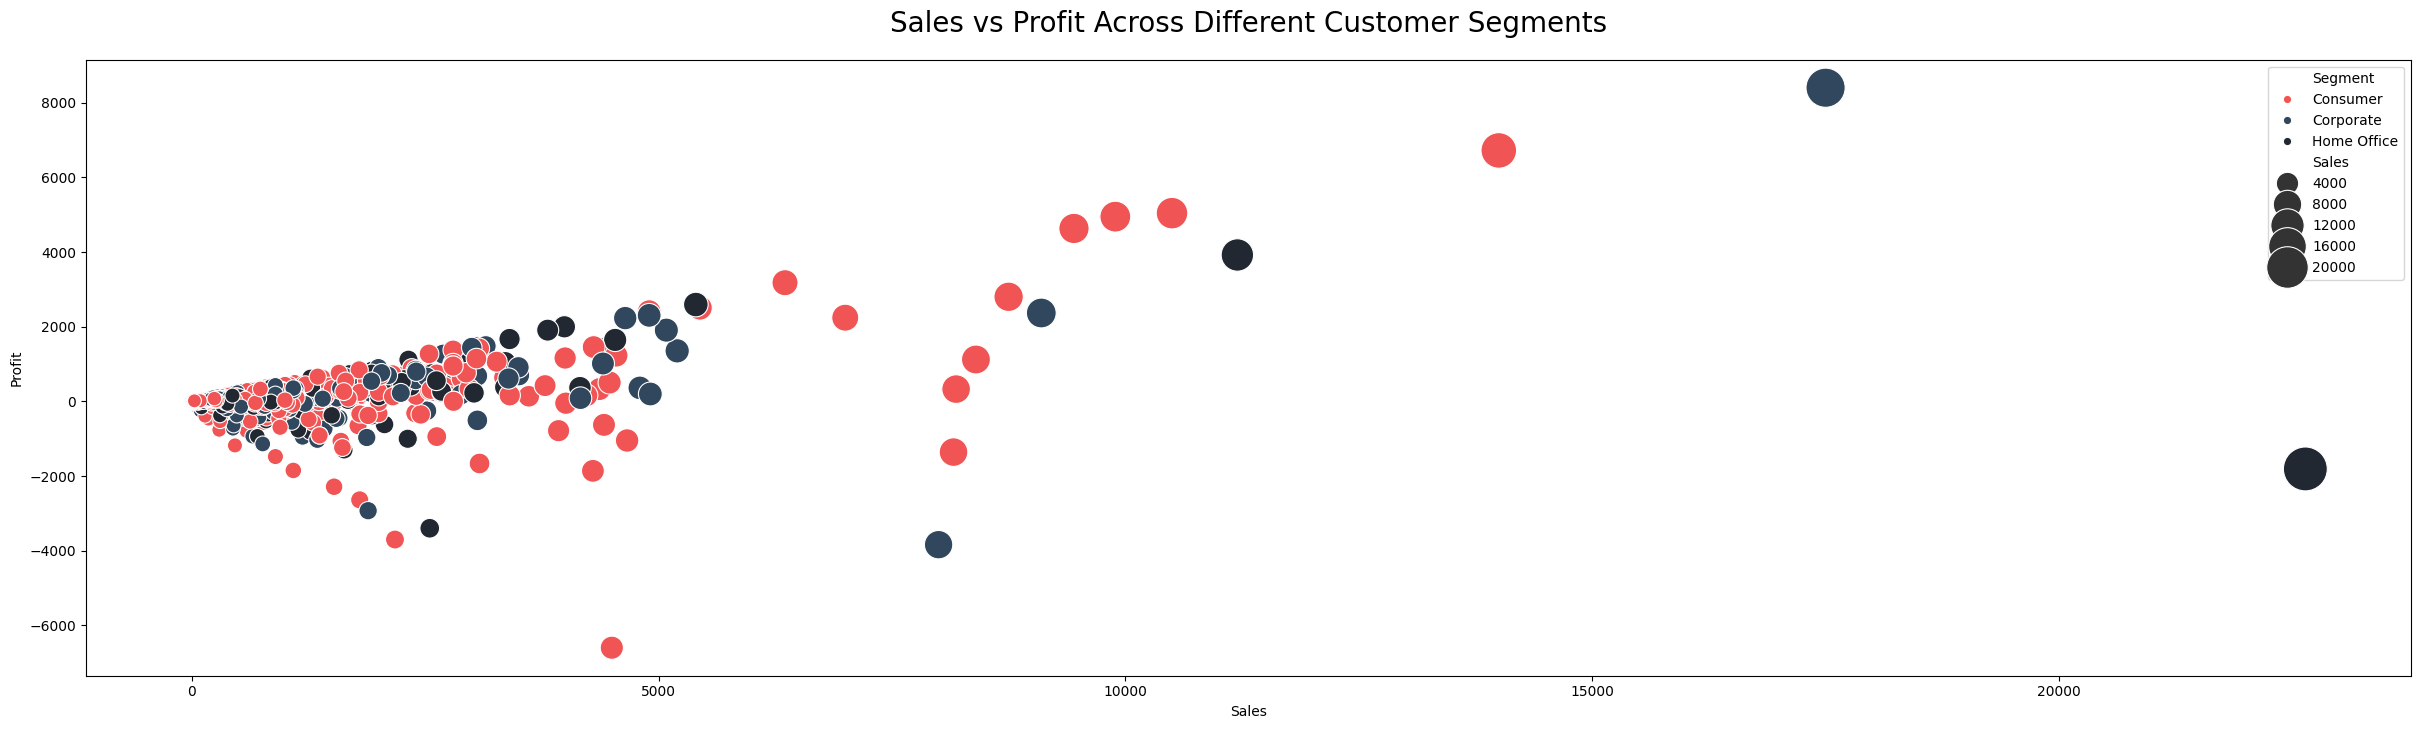

In [48]:
df_scatter = df[['Sales','Profit','Segment']].copy()

plt.figure(figsize=[30,8])

sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], palette=['#F05454','#30475E','#222831'], size=df_scatter["Sales"], sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

Sales:
While the Consumer segment contributes to the highest total sales, the Home Office segment generates higher average sales per transaction. This suggests that consumers are more frequent buyers but tend to make smaller purchases, whereas home office customers, though fewer in number, make larger purchases on average.

Profitability:
Similarly, the Consumer segment has the highest total profit, but the Home Office segment achieves greater average profit per transaction. This indicates that the products or services sold to home office customers are more profitable on average.

Analyze the Orders & Sales

<h3>Thanks:</h3>
<ul>
    <li><a href="https://www.kaggle.com/code/juhi1994/superstore-analysis" target="_blank">Juhi Badiyani</a></li>
    <li><a href="https://www.kaggle.com/code/alaasedeeq/superstore-data-analysis-with-plotly" target="_blank">Alaa Sedeeq</a></li>
    <li><a href="https://www.kaggle.com/code/yesdeepakmittal/business-sales-dashboard" target="_blank">Deepak Mittal</a></li>
</ul>